In [27]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv("DP_study_result_new_nov_18.csv")
df.columns = ["control1", "control2", "test1", "test2", "test_follow_up", "q3", "q4", "initial_q"]
df

,control1,control2,test1,test2,test_follow_up,q3,q4,initial_q
0,2.5,3.0,NaN,NaN,NaN,I prefer knowing only the prediction accuracy ...,I prefer having both results,I know about differential privacy but I've nev...
1,NaN,NaN,1.0,1.0,Yes,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I know about differential privacy but I've nev...
2,1.0,1.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,I know about differential privacy and I've use...
3,3.5,3.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I know about differential privacy but I've nev...
4,NaN,NaN,1.5,2.0,Yes,I prefer knowing only the prediction accuracy ...,I prefer having only the result on the noisy data,I know about differential privacy but I've nev...
5,NaN,NaN,1.5,2.0,Yes,I prefer knowing only the prediction accuracy ...,I prefer having only the result on the noisy data,I don't know anything about differential privacy
6,3.5,3.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,No preference,I don't know anything about differential privacy
7,3.5,3.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I don't know anything about differential privacy
8,NaN,NaN,1.0,1.5,Yes,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,I don't know anything about differential privacy
9,NaN,NaN,2.0,2.0,Yes,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I know about differential privacy but I've nev...


In [29]:
print(len(df["control1"].dropna()), len(df["test1"].dropna()))

29 27


In [53]:
df["initial_q"].value_counts()

I don't know anything about differential privacy                                                                               27
I know about differential privacy but I've never used it in practice                                                           24
I know about differential privacy and I've used it in practice                                                                  4
I am an expert in differential privacy and I've done research / deployed real-world applications about differential privacy     1
Name: initial_q, dtype: int64

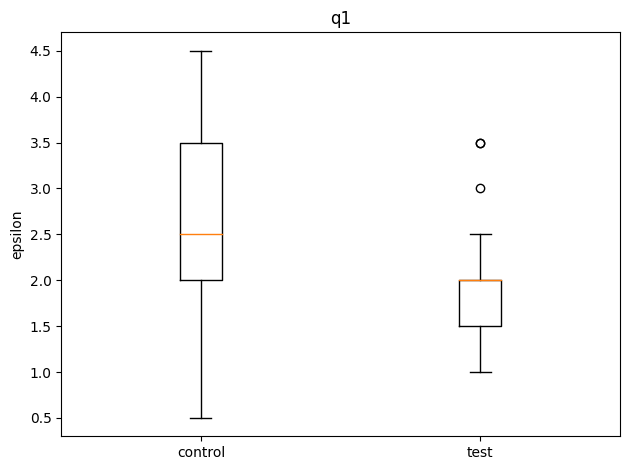

In [30]:
import matplotlib.pyplot as plt

plt.boxplot([df["control1"].dropna(), df["test1"].dropna()])
plt.xticks(ticks=[1, 2], labels=["control", "test"])
plt.ylabel("epsilon")
plt.title("q1")

plt.tight_layout()

plt.savefig("q1")
plt.show()

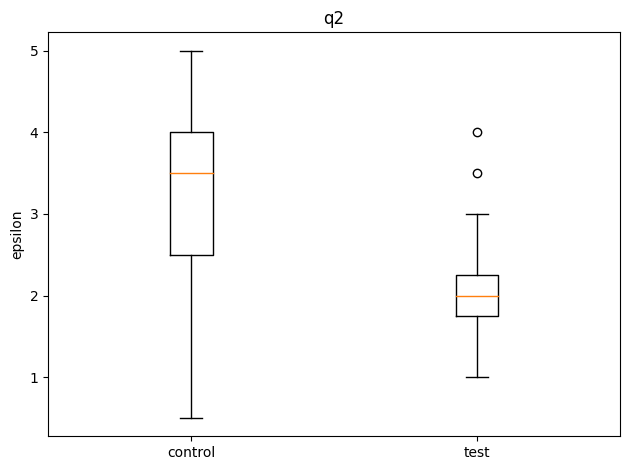

In [31]:
plt.boxplot([df["control2"].dropna(), df["test2"].dropna()])
plt.xticks(ticks=[1, 2], labels=["control", "test"])
plt.ylabel("epsilon")
plt.title("q2")

plt.tight_layout()

plt.savefig("q2")
plt.show()

In [49]:
def plot_hist(control, test, name):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(name)

    ax1.hist(control)
    ax2.hist(test)

    ax1.set_title("control")
    ax2.set_title("test")

    ax1.set_xticks(np.arange(0, 5.5, 0.5))
    ax2.set_xticks(np.arange(0, 5.5, 0.5))
    y_max = max(control.value_counts().max(), test.value_counts().max()) + 0.1
    ax1.set_ylim(0, y_max)
    ax2.set_ylim(0, y_max)


    ax1.set(xlabel='eps', ylabel='count')
    ax2.set(xlabel='eps', ylabel='count')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax1.label_outer()
    ax2.label_outer()

    fig.tight_layout()

    plt.savefig(f"{name}_histgram")
    plt.show()
    plt.close()

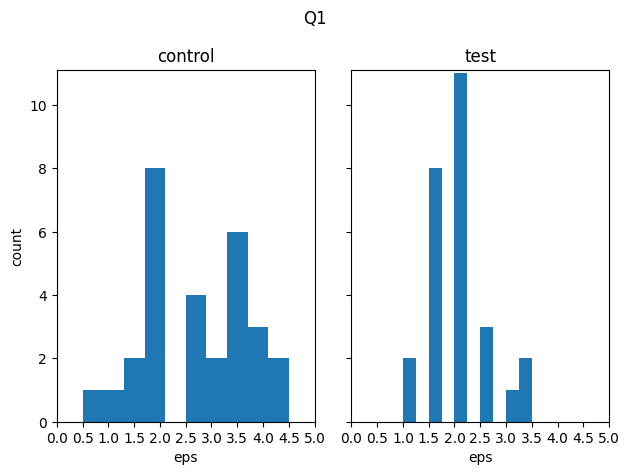

In [50]:
plot_hist(df["control1"].dropna(), df["test1"].dropna(), "Q1")

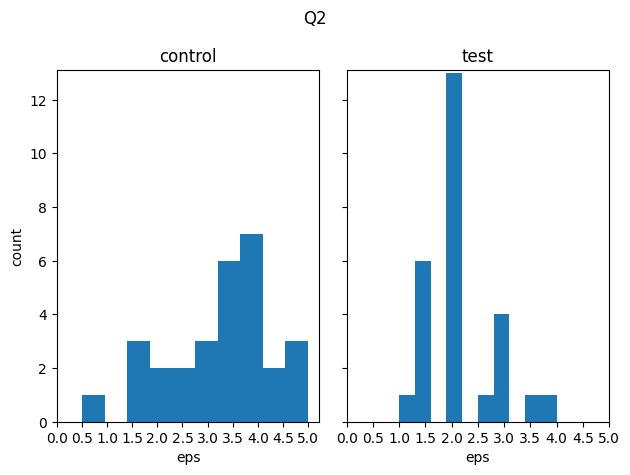

In [51]:
plot_hist(df["control2"].dropna(), df["test2"].dropna(), "Q2")